## 데이터
- from: https://kosis.kr/statHtml/statHtml.do?orgId=177&tblId=DT_117106_2021_007&vw_cd=MT_ZTITLE&list_id=F_65&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=MT_ZTITLE&path=%252FstatisticsList%252FstatisticsListIndex.do 

In [29]:
import pandas as pd
df_region = pd.read_csv('csv/지역별_질병분류코드별_발생자_수_발생자_수_200명_초과_질환__20240228114955.csv',  header=1)
df_popul = pd.read_csv('csv/인구__가구_및_주택_–_읍면동_연도_끝자리_0__5___시군구_그_외_연도__20240228120451.csv',  header=1)
df_salary = pd.read_csv('csv/질병분류코드별_성별_급여현황_등록_후_3개월___1__20240228114912.csv',  header=1)
df_age = pd.read_csv('csv/전국_질병분류코드별_성별_연령군별_발생자_수_발생자_수_200명_초과_질환__20240228114754.csv',  header=1)

### 전체 인구수 대비 지역별 발생자 비율

### 데이터

#### 희귀질환자 수 데이터 가공

In [30]:
df_region.columns

Index(['희귀질환명(1)', '질병분류코드', '발생자 수 (명)', '서울·인천 (명)', '경기 (명)', '강원 (명)',
       '충청 (명)', '영남 (명)', '호남 (명)', '제주 (명)', '알수없음 (명)'],
      dtype='object')

In [31]:
df_region = df_region.rename(columns={'희귀질환명(1)':'희귀질환명'})
df_region = df_region.rename(columns={'발생자 수 (명)':'발생자 수'})
df_region = df_region.rename(columns={'서울·인천 (명)':'서울인천'})
df_region = df_region.rename(columns={'경기 (명)':'경기'})
df_region = df_region.rename(columns={'강원 (명)':'강원'})
df_region = df_region.rename(columns={'충청 (명)':'충청'})
df_region = df_region.rename(columns={'영남 (명)':'영남'})
df_region = df_region.rename(columns={'호남 (명)':'호남'})
df_region = df_region.rename(columns={'제주 (명)':'제주'})

In [32]:
df_region.columns

Index(['희귀질환명', '질병분류코드', '발생자 수', '서울인천', '경기', '강원', '충청', '영남', '호남', '제주',
       '알수없음 (명)'],
      dtype='object')

In [33]:
df_region_extract = df_region[['희귀질환명', '발생자 수' ,'서울인천', '경기', '강원', '충청', '영남', '호남',
       '제주']].query('희귀질환명=="계"')
df_region_extract

,희귀질환명,발생자 수,서울인천,경기,강원,충청,영남,호남,제주
0,계,40149,10427,10365,1212,3863,9978,3742,559


#### 전체 인구수 데이터 가공

In [34]:
df_popul.columns

Index(['행정구역별(읍면동)', '총인구 (명)', '남자 (명)', '여자 (명)', '내국인-계 (명)', '내국인-남자 (명)',
       '내국인-여자 (명)', '외국인-계 (명)', '외국인-남자 (명)', '외국인-여자 (명)', '가구-계 (가구)',
       '일반가구 (가구)', '집단가구 (가구)', '외국인가구 (가구)', '주택-계 (호)', '단독주택 (호)',
       '아파트 (호)', '연립주택 (호)', '다세대주택 (호)', '비거주용 건물내 주택 (호)', '주택이외의 거처 (호)'],
      dtype='object')

In [35]:
df_popul

,행정구역별(읍면동),총인구 (명),남자 (명),여자 (명),내국인-계 (명),내국인-남자 (명),내국인-여자 (명),외국인-계 (명),외국인-남자 (명),외국인-여자 (명),...,일반가구 (가구),집단가구 (가구),외국인가구 (가구),주택-계 (호),단독주택 (호),아파트 (호),연립주택 (호),다세대주택 (호),비거주용 건물내 주택 (호),주택이외의 거처 (호)
0,전국,51829136,25915207,25913929,50133493,24972588,25160905,1695643,942619,753024,...,20926710,16388,541687,18525844,3897729,11661851,521606,2230787,213871,1000903
1,읍부,5113052,2624351,2488701,4904647,2494271,2410376,208405,130080,78325,...,2021664,2353,56367,1992568,579820,1142894,79981,159041,30832,74804
2,면부,4650781,2420392,2230389,4394145,2237761,2156384,256636,182631,74005,...,2008345,4237,56296,2105345,1539804,427449,36565,69672,31855,103889
3,동부,42065303,20870464,21194839,40834701,20240556,20594145,1230602,629908,600694,...,16896701,9798,429024,14427931,1778105,10091508,405060,2002074,151184,822210
4,서울특별시,9586195,4647733,4938462,9219741,4474343,4745398,366454,173390,193064,...,3982290,2264,141970,3015371,307075,1772670,110562,796066,28998,248125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,읍부,153767,79230,74537,143607,72697,70910,10160,6533,3627,...,60060,78,2163,62136,41490,5000,8417,5482,1747,3482
320,면부,35539,18365,17174,33603,17103,16500,1936,1262,674,...,14992,18,487,15778,12618,504,1148,1048,460,869
321,동부,481552,240578,240974,466817,233204,233613,14735,7374,7361,...,188016,114,4507,168537,41771,72632,21080,29345,3709,13782
322,제주시,492306,247474,244832,474196,237502,236694,18110,9972,8138,...,191619,140,5049,173767,61290,59693,19620,29135,4029,14189


In [36]:
df_popul = df_popul.rename(columns={'행정구역별(읍면동)':'행정구역별'})

In [37]:
df_popul_extract = df_popul[['행정구역별', '총인구 (명)']]
df_popul_extract['행정구역별_extract'] = pd.Series([])
df_popul_extract

/tmp/ipykernel_69618/1272637923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_popul_extract['행정구역별_extract'] = pd.Series([])


,행정구역별,총인구 (명),행정구역별_extract
0,전국,51829136,NaN
1,읍부,5113052,NaN
2,면부,4650781,NaN
3,동부,42065303,NaN
4,서울특별시,9586195,NaN
...,...,...,...
319,읍부,153767,NaN
320,면부,35539,NaN
321,동부,481552,NaN
322,제주시,492306,NaN


In [38]:
df_popul['행정구역별'].values

array(['전국', '읍부', '면부', '동부', '서울특별시', '종로구', '중구', '용산구', '성동구', '광진구',
       '동대문구', '중랑구', '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구',
       '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구',
       '송파구', '강동구', '부산광역시', '읍부', '면부', '동부', '중구', '서구', '동구', '영도구',
       '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구', '강서구', '연제구',
       '수영구', '사상구', '기장군', '대구광역시', '읍부', '면부', '동부', '중구', '동구', '서구',
       '남구', '북구', '수성구', '달서구', '달성군', '인천광역시', '읍부', '면부', '동부', '중구',
       '동구', '연수구', '남동구', '부평구', '계양구', '서구', '미추홀구', '강화군', '옹진군',
       '광주광역시', '동구', '서구', '남구', '북구', '광산구', '대전광역시', '동구', '중구', '서구',
       '유성구', '대덕구', '울산광역시', '읍부', '면부', '동부', '중구', '남구', '동구', '북구',
       '울주군', '세종특별자치시', '읍부', '면부', '동부', '세종시', '경기도', '읍부', '면부', '동부',
       '수원시', '장안구', '권선구', '팔달구', '영통구', '성남시', '수정구', '중원구', '분당구',
       '의정부시', '안양시', '만안구', '동안구', '부천시', '광명시', '평택시', '동두천시', '안산시',
       '상록구', '단원구', '고양시', '덕양구', '일산동구', '일산서구', '과천시', '구리시

In [39]:
df_region.columns

Index(['희귀질환명', '질병분류코드', '발생자 수', '서울인천', '경기', '강원', '충청', '영남', '호남', '제주',
       '알수없음 (명)'],
      dtype='object')

In [40]:
def change_region(x):
    if x == "서울특별시" or x == "인천광역시":
        y= '서울인천'
    elif x =='경기도':
        y=  '경기'
    elif x =='강원도':
        y=  '강원'
    elif x=='충청북도' or x =='충청남도' or x=='대전광역시'or x=='세종특별자치시':
        y=  '충청'
    elif x=='경상북도' or x ==  '경상남도' or x ==  '대구광역시' or x ==  '부산광역시' or x ==  '울산광역시':
        y= '영남'
    elif x == '전라북도' or x ==  '전라남도' or x ==  '광주광역시':
        y=  '호남'
    elif x == '제주특별자치도':
        y= '제주'
    else :
        y=None
    return y

df_popul_extract["행정구역별_extract"] = df_popul_extract["행정구역별"].apply(change_region)


/tmp/ipykernel_69618/274928021.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_popul_extract["행정구역별_extract"] = df_popul_extract["행정구역별"].apply(change_region)


In [41]:
df_popul_extract

,행정구역별,총인구 (명),행정구역별_extract
0,전국,51829136,None
1,읍부,5113052,None
2,면부,4650781,None
3,동부,42065303,None
4,서울특별시,9586195,서울인천
...,...,...,...
319,읍부,153767,None
320,면부,35539,None
321,동부,481552,None
322,제주시,492306,None


In [42]:
df_popul_extract = df_popul_extract.rename(columns={'총인구 (명)':'총인구'})

In [43]:
import numpy as np
pdf1 = pd.pivot_table(df_popul_extract,                # 피벗할 데이터프레임
                     index = '행정구역별_extract',    # 행 위치에 들어갈 열    # 열 위치에 들어갈 열
                     values='총인구',
                     aggfunc = np.sum)   # 데이터 집계함수
pdf1

/tmp/ipykernel_69618/1440287436.py:2: FutureWarning: The provided callable <function sum at 0x7f18353ce2a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pdf1 = pd.pivot_table(df_popul_extract,                # 피벗할 데이터프레임


,총인구
행정구역별_extract,
강원,1521763
경기,13511676
서울인천,12531649
영남,12872952
제주,670858
충청,5651092
호남,5069146


In [44]:
df_popul_extract

,행정구역별,총인구,행정구역별_extract
0,전국,51829136,None
1,읍부,5113052,None
2,면부,4650781,None
3,동부,42065303,None
4,서울특별시,9586195,서울인천
...,...,...,...
319,읍부,153767,None
320,면부,35539,None
321,동부,481552,None
322,제주시,492306,None


In [85]:
df_popul_extract = pdf1.rename(columns={'총인구':'전체'}).T

In [86]:
df_popul_extract['전체'] = 12531649+13511676+1521763+5651092+12872952+5069146+670858

In [87]:
df_popul_extract = df_popul_extract[['전체','서울인천', '경기', '강원', '충청', '영남', '호남', '제주']]

In [88]:
df_popul_extract

행정구역별_extract,전체,서울인천,경기,강원,충청,영남,호남,제주
전체,51829136,12531649,13511676,1521763,5651092,12872952,5069146,670858


In [94]:
df_region_extract=df_region_extract.rename(columns={'발생자 수':'전체'})

In [95]:
df_combined = pd.concat([df_region_extract, df_popul_extract], ignore_index=True)
df_combined = df_combined[['전체',	'서울인천',	'경기',	'강원',	'충청',	'영남',	'호남',	'제주']].T
df_combined

,0,1
전체,40149,51829136
서울인천,10427,12531649
경기,10365,13511676
강원,1212,1521763
충청,3863,5651092
영남,9978,12872952
호남,3742,5069146
제주,559,670858


In [96]:
df_combined[0] = df_combined[0].astype(int)
df_combined[1] = df_combined[1].astype(int)

In [97]:
df_combined['percent'] = round(df_combined[0]/df_combined[1]*100, 4)

In [98]:
data = {
    'index': df_combined.index.tolist(),
    'percent': df_combined['percent'].values.tolist()}
pd.DataFrame(data)

,index,percent
0,전체,0.0775
1,서울인천,0.0832
2,경기,0.0767
3,강원,0.0796
4,충청,0.0684
5,영남,0.0775
6,호남,0.0738
7,제주,0.0833


In [99]:
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_69618/1005235179.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data= pd.DataFrame(data),x= "index",y= "percent", ci=None)


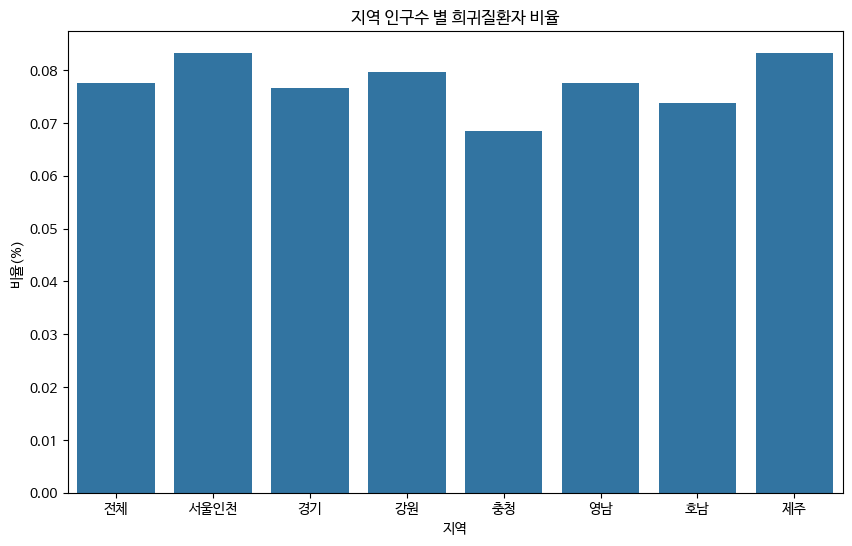

In [105]:
# plt 기본 구조
plt.figure(figsize=(10, 6))
sns.barplot(data= pd.DataFrame(data),x= "index",y= "percent", ci=None)
plt.xlabel('지역')
plt.ylabel('비율(%)')
plt.title('지역 인구수 별 희귀질환자 비율')
plt.show()

In [101]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detecte

In [160]:
df_age = df_age.rename(columns={'성별(1)':'성별'})
df_age = df_age.rename(columns={'<1':'1세이하'})
df_age = df_age.rename(columns={'1~9':'10세미만'})
df_age = df_age.rename(columns={'80<=':'80대'})

In [161]:
df_age_extract = df_age.query('성별=="계"')

In [162]:
df_age_extract = df_age_extract.loc[:0]

In [163]:
df_age_extract = df_age_extract.T.loc['1세이하':'80대']

In [164]:
df_age_extract

,0
1세이하,466
10세미만,799
10~19,2272
20~29,4196
30~39,4344
40~49,5345
50~59,7072
60~69,8618
70~79,6602
80대,3365


In [165]:
df_age_extract[0] =df_age_extract[0].astype(int)

In [167]:
data = {
    'age': df_age_extract.index.tolist(),
    'number': df_age_extract[0].values.tolist()}
pd.DataFrame(data)

,age,number
0,1세이하,466
1,10세미만,799
2,10~19,2272
3,20~29,4196
4,30~39,4344
5,40~49,5345
6,50~59,7072
7,60~69,8618
8,70~79,6602
9,80대,3365


/tmp/ipykernel_69618/3846598463.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=pd.DataFrame(data),x= "age",y= "number", ci=None)


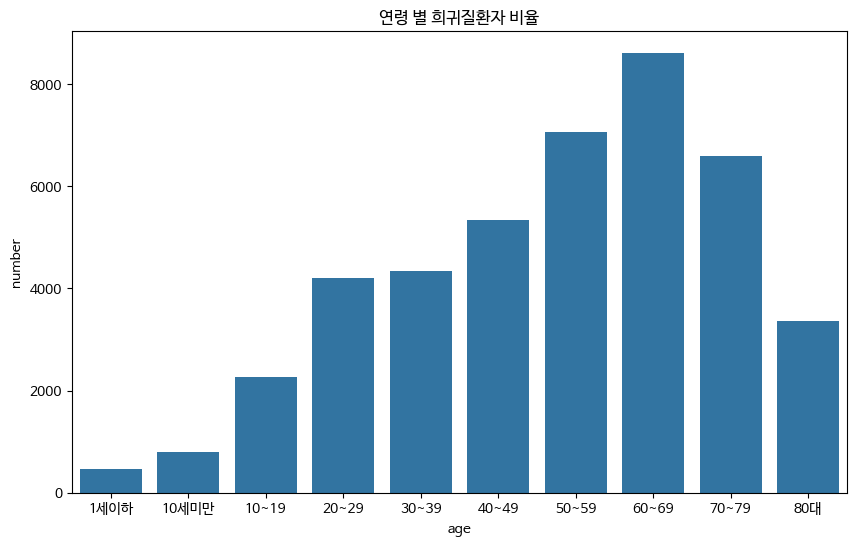

In [172]:
# plt 기본 구조
plt.figure(figsize=(10, 6))
sns.barplot(data=pd.DataFrame(data),x= "age",y= "number", ci=None)
plt.title('연령 별 희귀질환자 비율')
plt.show()